In [10]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 


In [11]:
df=pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
df.shape

(1000, 8)

In [13]:
#checking missing values 
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [14]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

##Insights and missing values 

There is no missing values 

In [15]:
df.duplicated().sum()

0

In [16]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [17]:
## check datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [18]:
# checking the number uniques values 
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [19]:
# checking the statistics 
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [22]:
#segrregate numerical and categorical features
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_feature=[feature for feature in df.columns if df[feature].dtype=='O']

In [16]:
numerical_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

In [17]:
categorical_feature

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [23]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [24]:
##Agerate the total score with mean 
df['total_score']=(df['math score']+df['reading score']+df['writing score'])
df['average']=df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<AxesSubplot: xlabel='average', ylabel='Count'>

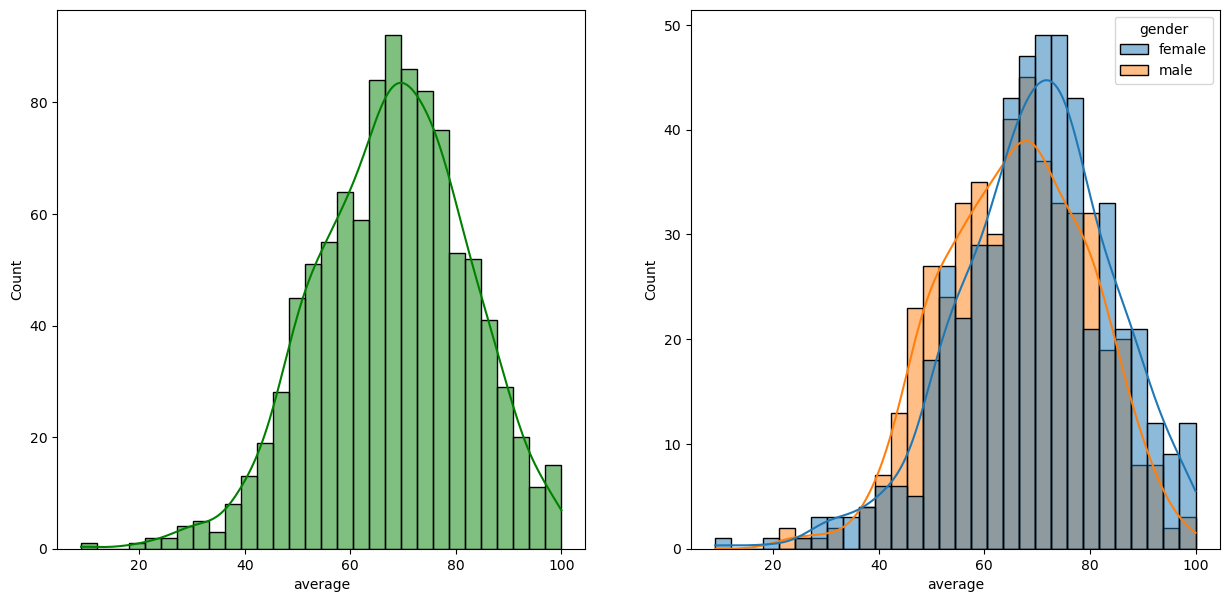

In [31]:
##visualization
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender',color='g')
                     

## Insights
Female student tend to perform well than male students

<AxesSubplot: xlabel='average', ylabel='Count'>

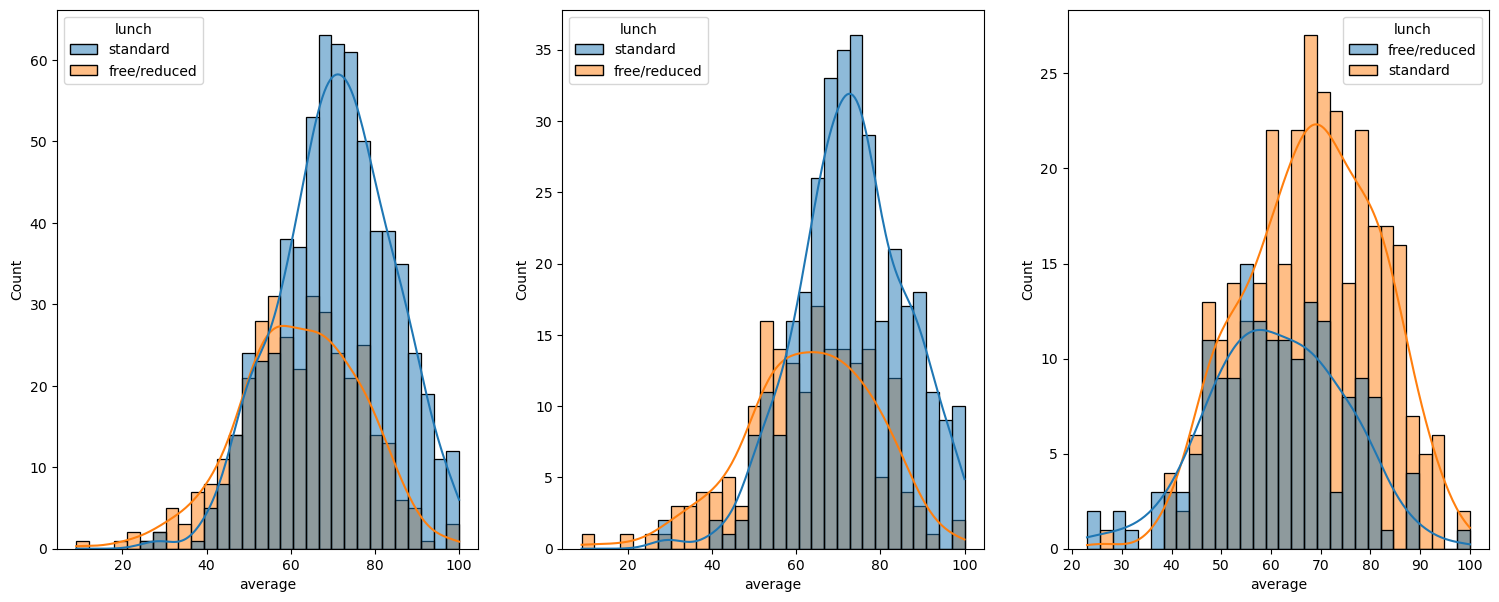

In [35]:
fig,axis=plt.subplots(1,3,figsize=(25,7))
plt.subplot(141)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='lunch',color='g')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',bins=30,kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',bins=30,kde=True,hue='lunch')

## Insights
- Standard Lunch help students perform well in exams
- Standard lunch helps perform well in exams be it a male of female

In [36]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<AxesSubplot: xlabel='average', ylabel='Count'>

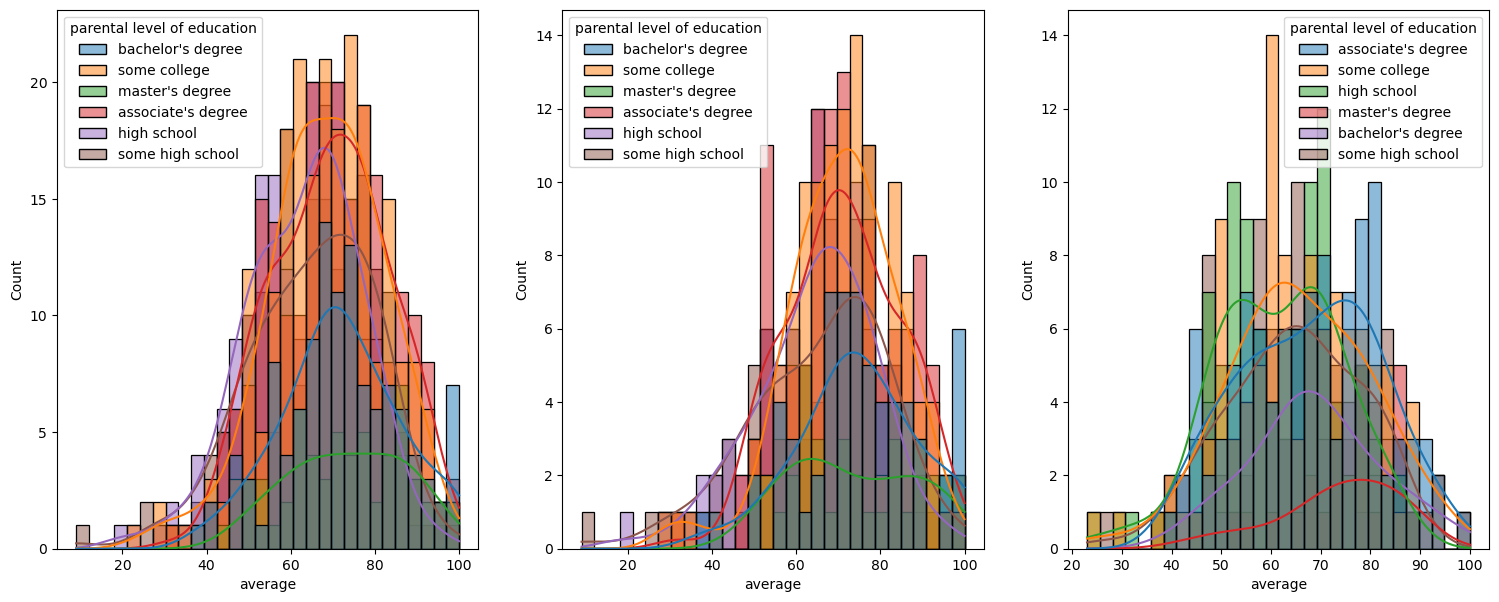

In [39]:
fig,axis=plt.subplots(1,3,figsize=(25,7))
plt.subplot(141)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='parental level of education',color='g')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',bins=30,kde=True,hue='parental level of education'	)
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',bins=30,kde=True,hue='parental level of education')

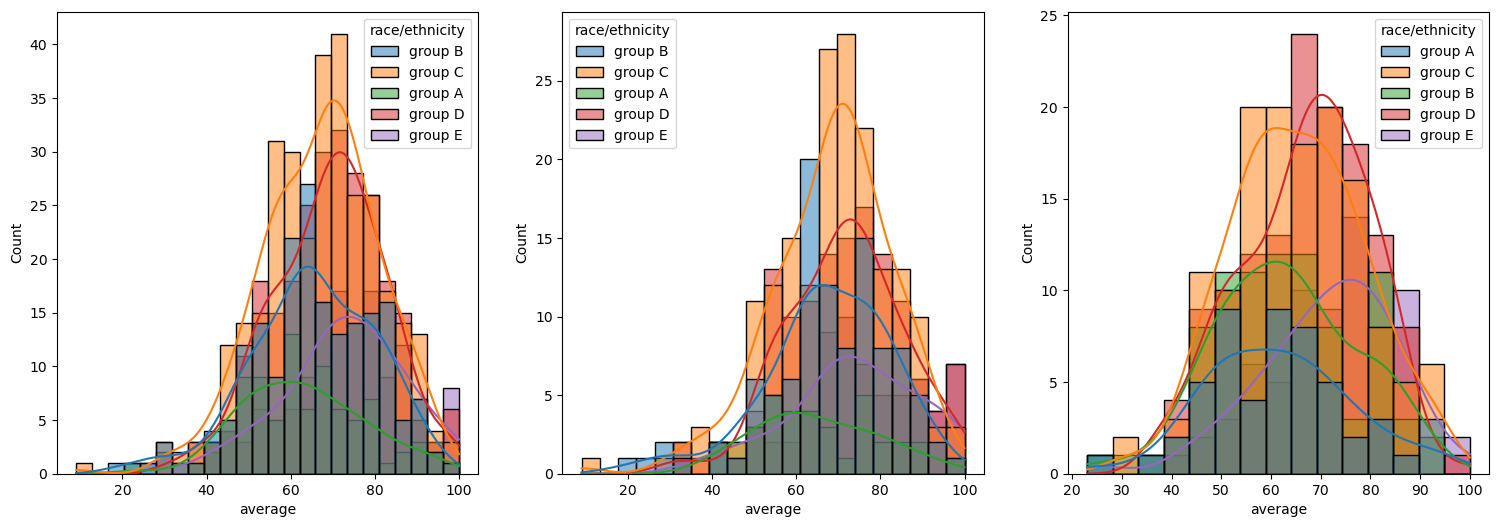

In [42]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

<AxesSubplot: >

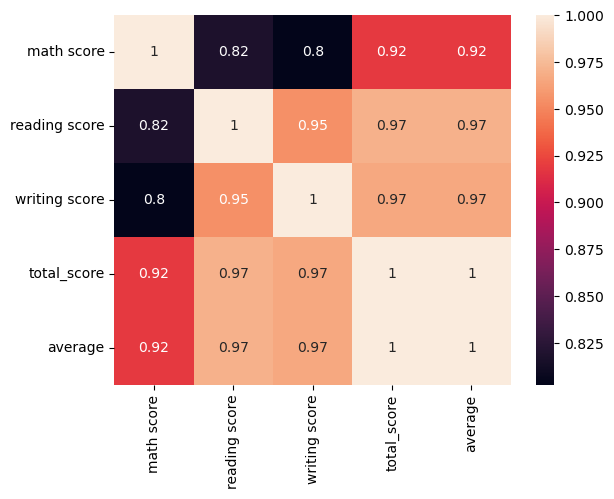

In [43]:
sns.heatmap(df.corr(),annot=True)